# Machine learning pipeline

## 1. importing the data and libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## 2. Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
df = df.dropna()

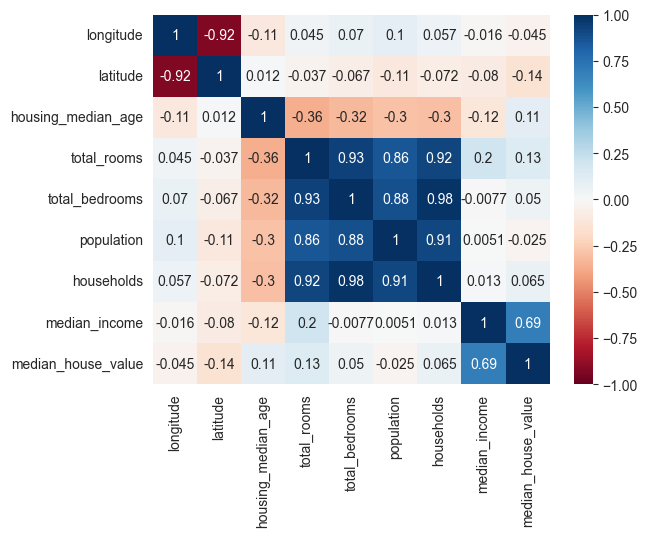

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="RdBu")
plt.show()

In [8]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

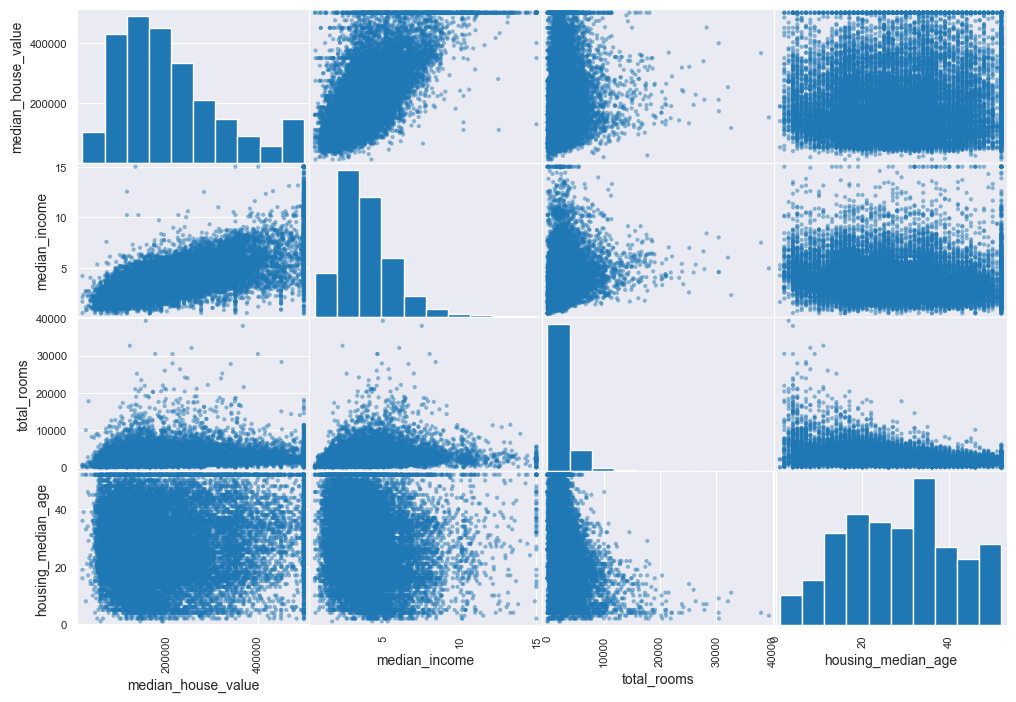

In [9]:
# checking the correlation of the most promising features
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[features], figsize=(12, 8))

The most promising feature to predict our target which is the median house value is the median income.

Apparently the more income a person has the more chances they have to buy a more expensive house.

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

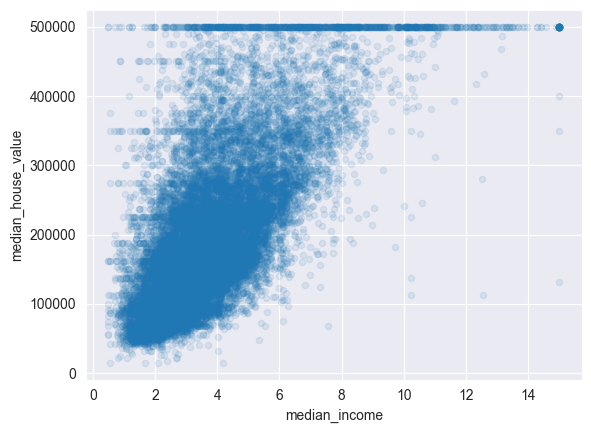

In [10]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

We can see that the data points are not too disperse and there is an upward trend confirmating what was declared before.

There is a price cap at 500k and horizontal lines at 450k, 350k, and 280k.

### 2.1 Data visualization

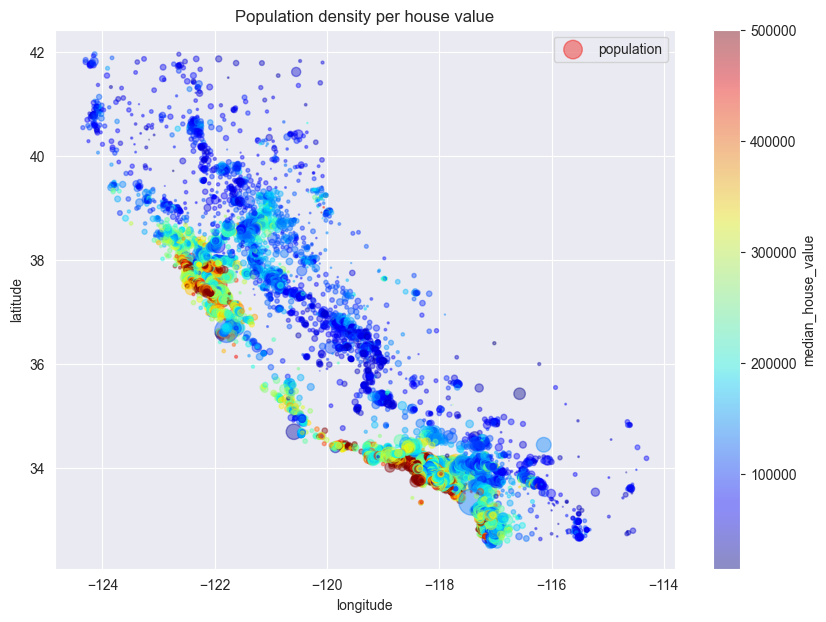

In [11]:
# The radius of each circle represents the district’s population (option s), 
# and the color represents the price (option c).
df.plot(x="longitude", y="latitude", kind="scatter", alpha=0.4, cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(10,7), s=df["population"]/100, c="median_house_value", label="population")
plt.legend()
plt.title("Population density per house value")
plt.show()

if we take a look this plot looks like the state of california

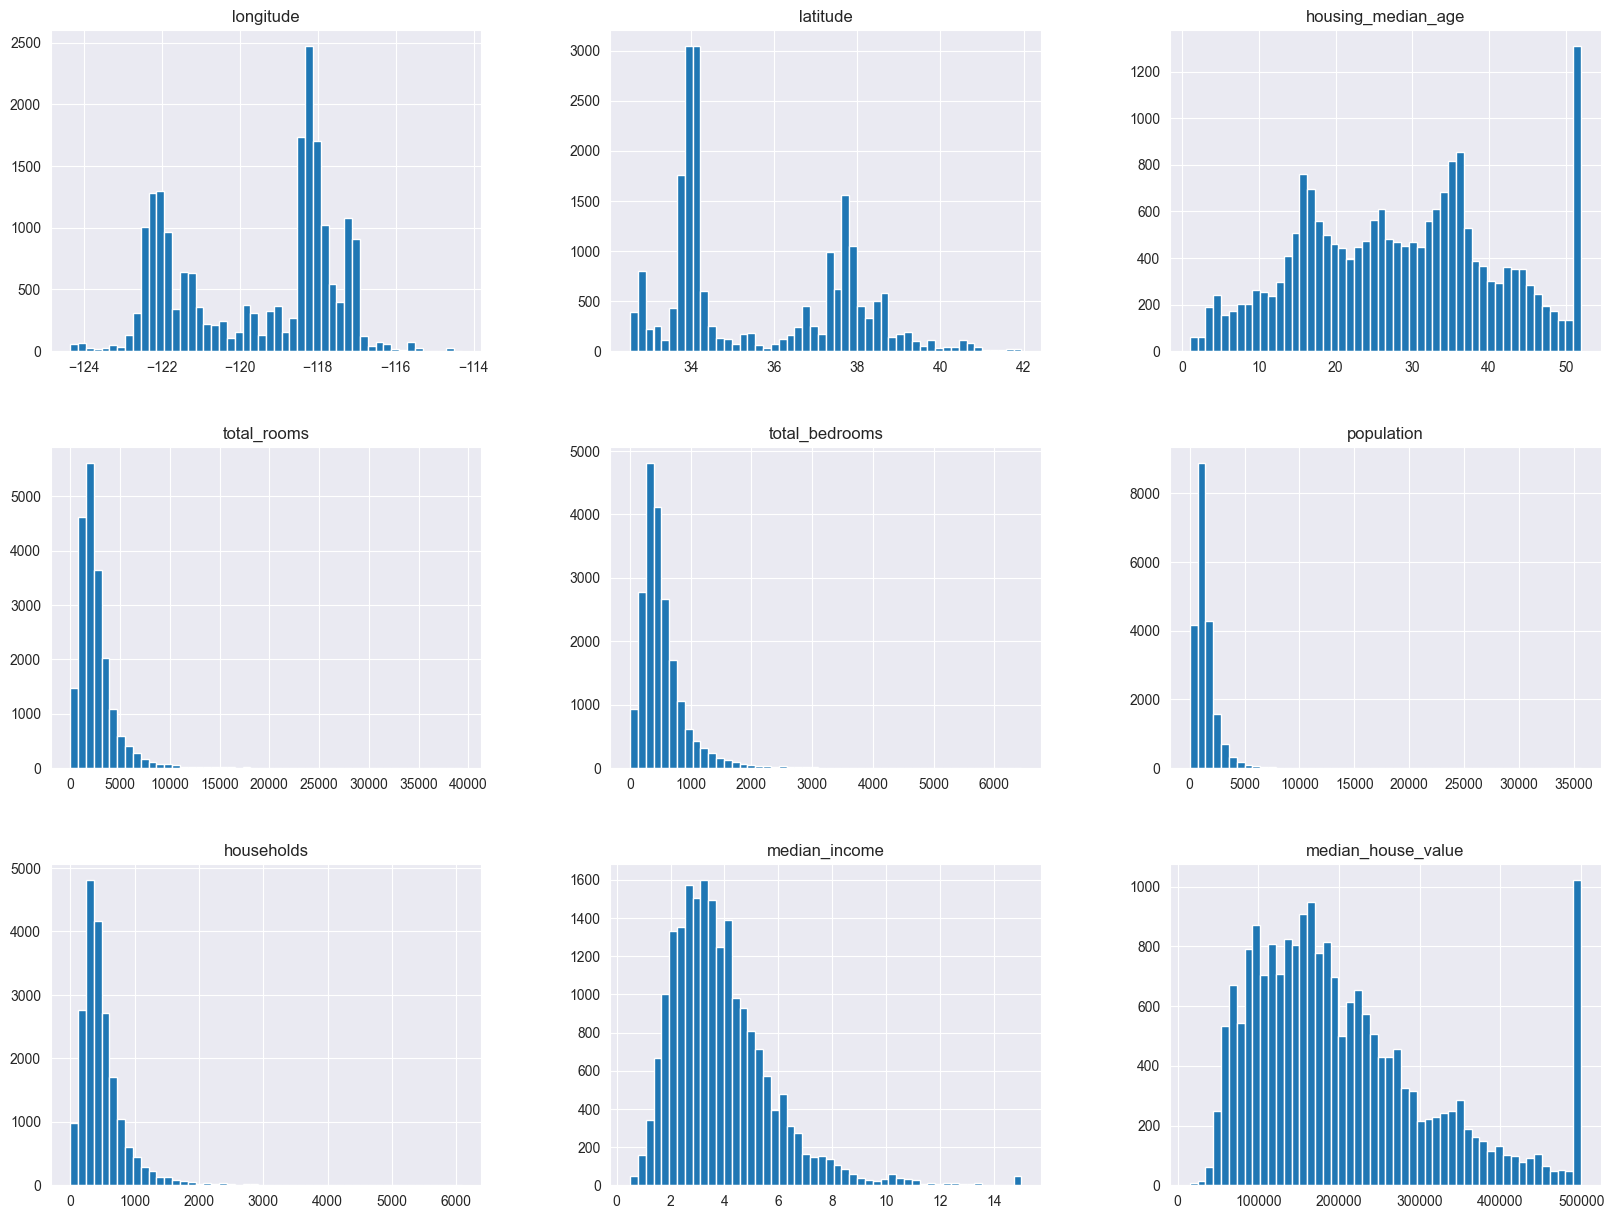

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

#### 2.1.1 Univariate analysis

[]

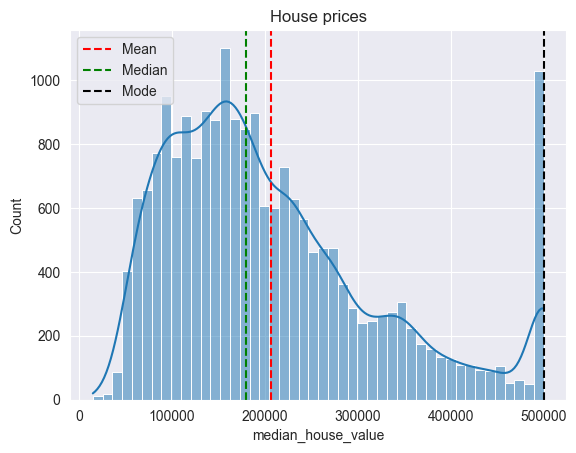

In [13]:
sns.histplot(df["median_house_value"],kde=True) # kde shows the curved line
# plots a line that shows the mean, median and mode
plt.axvline(np.mean(df["median_house_value"]), color="red", linestyle="--", label="Mean")
plt.axvline(np.median(df["median_house_value"]), color="green", linestyle="--", label="Median")
plt.axvline(df["median_house_value"].mode().values[0], color="black", linestyle='--', label="Mode")
plt.legend()
plt.title("House prices")
plt.plot()

<AxesSubplot: xlabel='median_house_value', ylabel='Density'>

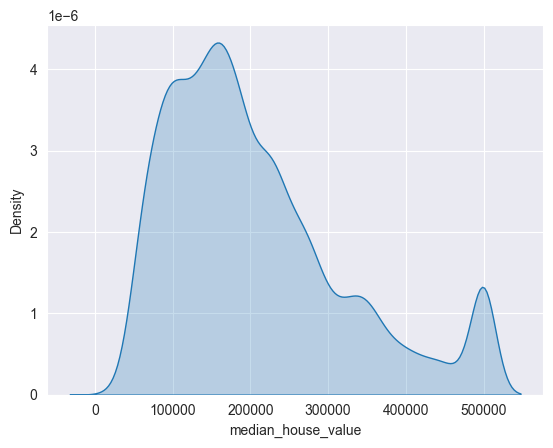

In [14]:
# checking the density of median_house_value
sns.kdeplot(df["median_house_value"], shade=True)

In [15]:
# using px to show the values of min, max, quantiles 1, 2 and 3 as well the outliers
fig = px.box(df, y="median_house_value")
fig.show()

### 2.2 Data cleaning

In [16]:
def remove_outliers(df, features, n_std):
    """
    Removes outliers that are (n) standard deviations away from the mean from the numerical features
    """
    for feature in features:
        print("Working on feature: {0}".format(feat))
        # sample standard deviation and mean
        mean = np.mean(df[feature])
        standard_deviation = np.std(df[feature], ddof=1)
        # removing the outliers that lie more than n_std (standard deviation) from the mean
        df = df[(df[feature] <= mean + (n_std * standard_deviation))]
    return df

In [17]:
# gets the features from the dataframe
FEATURES = df.columns.drop("median_house_value")

# gets the numeric type columns from the dataframe
NUMERICAL = df[FEATURES].select_dtypes("number").columns

# gets the categorical columns by comparing them with the numeric ones
CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))

In [18]:
print("Numerical features:", NUMERICAL)
print("Categorical features: ", CATEGORICAL)

Numerical features: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Categorical features:  Index(['ocean_proximity'], dtype='object')


In [19]:
df_cleaned = remove_outliers(df, NUMERICAL, 3)
df_cleaned.head()

Working on feature: longitude
Working on feature: latitude
Working on feature: housing_median_age
Working on feature: total_rooms
Working on feature: total_bedrooms
Working on feature: population
Working on feature: households
Working on feature: median_income


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18897 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18897 non-null  float64
 1   latitude            18897 non-null  float64
 2   housing_median_age  18897 non-null  int64  
 3   total_rooms         18897 non-null  int64  
 4   total_bedrooms      18897 non-null  float64
 5   population          18897 non-null  int64  
 6   households          18897 non-null  int64  
 7   median_income       18897 non-null  float64
 8   ocean_proximity     18897 non-null  object 
 9   median_house_value  18897 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [21]:
print("Before:{0}, After:{1}".format(df.shape, df_cleaned.shape))

Before:(20433, 10), After:(18897, 10)


## 3. Preprocessing and Machine learning pipeline

Let’s streamline the code using Scikit-learn’s Pipeline and ColumnTransformer

To understand how it works we need to know about Transformer, Estimator and Pipeline:

Transformer: it refers to an object with fit() and transform() methods that clean, reduce and expand or generate features. Simply put, transformers help you transform your data towards a desired format for a machine learning model. OneHotEncoder and StandardScaler are examples of transformers.

Estimator: An estimator refers to a machine learning model. It is an object with fit() and predict() method.

Pipeline: The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [22]:
X = df_cleaned.drop("median_house_value", axis=1)
y = df_cleaned["median_house_value"]

In [23]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [24]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 18897, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# pipeline that imputes and scales the numerical data
numerical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# pipeline that imputes and encodes the categorical data
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False))
])

# preprocessing the data from the pipelines by passing the pipeline and the features
preprocessors = ColumnTransformer(transformers=[
    ("numerical", numerical_pipe, NUMERICAL),
    ("categorical", categorical_pipe, CATEGORICAL)
])

In [27]:
# pipeline that trains the model 
pipe = Pipeline([
    ("preprocessors", preprocessors),
    ("model", RandomForestRegressor())
])

In [28]:
model = pipe.fit(X_train, y_train)

In [29]:
predictions = model.predict(X_test)

In [30]:
pred_df = pd.DataFrame({"actual": y_test, "predicted": predictions})
pred_df.head()

,actual,predicted
13704,78300,74392.00
12143,122100,141610.00
9503,109400,135025.00
8373,157500,175176.00
14358,345700,364223.08


In [31]:
print("R2 score: %f" % r2_score(y_test, predictions))
print("MSE: %f" % mean_squared_error(y_test, predictions))
print("RMSE: %f" % np.sqrt(mean_squared_error(y_test, predictions)))

R2 score: 0.790612
MSE: 2629290680.126108
RMSE: 51276.609484
